# Spaceship Logistic Regression (LogReg) Submission

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn 

# Bring the Data In

In [12]:
X_df = pd.read_csv('spaceship_train_X_v2.csv')
y_df = pd.read_csv('spaceship_train_y.csv')
X_submission = pd.read_csv('spaceship_test_X_v2.csv')

y_df.drop('Unnamed: 0', axis=1, inplace=True)
X_df.head()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure,NoSpending,...,CabinSide_Z,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,AgeEncoded
0,0001_01,0,0,-0.337530,-0.283865,-0.287383,-0.273826,-0.265831,-0.518357,1,...,0,0,1,0,0,0,0,0,0,3.0
1,0002_01,0,0,-0.172455,-0.278226,-0.245562,0.213965,-0.227033,-0.256582,0,...,0,0,0,0,0,0,1,0,0,2.0
2,0003_01,0,1,-0.272409,1.956643,-0.287383,5.692512,-0.222625,3.174596,0,...,0,1,0,0,0,0,0,0,0,4.0
3,0003_02,0,0,-0.337530,0.519986,0.333240,2.684020,-0.095651,1.322607,0,...,0,1,0,0,0,0,0,0,0,2.0
4,0004_01,0,0,0.121349,-0.240007,-0.034784,0.228181,-0.264067,-0.130318,0,...,0,0,0,0,0,0,1,0,0,1.0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, stratify=y_df, test_size=0.1, train_size=0.9, random_state=1)

# Ini buat ganti y_train and y_test ke 1D array
y_train = y_train['Transported'].values
y_test = y_test['Transported'].values

# Model!

We'll be playing with the 'C' coefficient. 

- Lower 'C' value: higher regularization, model coefficients are close to 0.

- Higher 'C' value: lower regularization, fit the training data more.

In [14]:
from sklearn.linear_model import LogisticRegression

# Testing with multiple 'C' coefficient values
c_range = np.arange(0.001, 20, 0.1)
training_accuracy = []
testing_accuracy = []

for c in c_range:
    logreg = LogisticRegression(C=c).fit(X_train, y_train)
    training_accuracy.append(logreg.score(X_train, y_train))
    testing_accuracy.append(logreg.score(X_test, y_test))

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

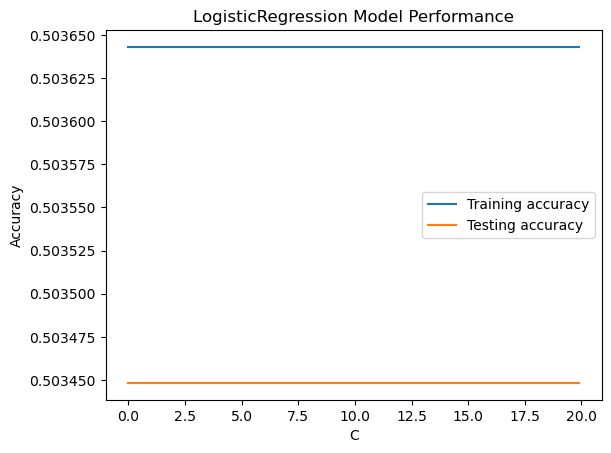

In [15]:
logreg_performance = {'c':c_range, 'training_accuracy':training_accuracy, 'testing_accuracy':testing_accuracy}
logreg_performance = pd.DataFrame(logreg_performance)
sns.lineplot(data=logreg_performance, x='c', y='training_accuracy', label='Training accuracy')
sns.lineplot(data=logreg_performance, x='c', y='testing_accuracy', label='Testing accuracy')

plt.title("LogisticRegression Model Performance")
plt.xlabel("C")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [16]:
logreg_performance.sort_values(by='testing_accuracy', ascending=False)

,c,training_accuracy,testing_accuracy
0,0.001,0.503643,0.503448
137,13.701,0.503643,0.503448
127,12.701,0.503643,0.503448
128,12.801,0.503643,0.503448
129,12.901,0.503643,0.503448
...,...,...,...
69,6.901,0.503643,0.503448
70,7.001,0.503643,0.503448
71,7.101,0.503643,0.503448
72,7.201,0.503643,0.503448


## Takeaway

In this case, we will proceed with C=1

# Submission Prediction

In [17]:
clf = LogisticRegression(C=1)

# For training, we use ALL data from spaceship_train_X_v2.csv and spaceship_train_y.csv
clf.fit(X_df, y_df['Transported'].values)

# Generate prediction for spaceship_test_X_v2.csv
y_prediction = clf.predict(X_submission)
print(y_prediction)

[1 1 1 ... 1 1 1]


In [18]:
submission_dict = {'PassengerId':X_submission['PassengerId'], 'Transported':y_prediction.astype('bool')}
submission_dict = pd.DataFrame(submission_dict)
submission_dict

,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


## Export CSV

In [19]:
submission_dict.to_csv('spaceship_logreg_c1_submission.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a79941c-6614-47fe-9427-0e9f23998893' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>